# Numpy (CPU) Demo

In [1]:
import pandas as pd
import numpy as np
from tsdata_to_infocrit import  tsdata_to_infocrit
from tsdata_to_var import tsdata_to_var
from var_to_autocov import var_to_autocov
from autocov_to_pwcgc import autocov_to_pwcgc
import seaborn as sns

,0,1,2,3,4,5,6
0,NaN,0.0063,0.0027,0.0054,0.0138,0.0043,0.0137
1,0.0051,NaN,0.0040,0.0252,0.0150,0.0216,0.0051
2,0.0070,0.0056,NaN,0.0065,0.0262,0.0044,0.0105
3,0.0097,0.0334,0.0055,NaN,0.0034,0.0085,0.0023
4,0.0088,0.0039,0.0081,0.0072,NaN,0.0016,0.0147
5,0.0045,0.0084,0.0043,0.0138,0.0204,NaN,0.0045
6,0.0043,0.0129,0.0024,0.0058,0.0101,0.0069,NaN


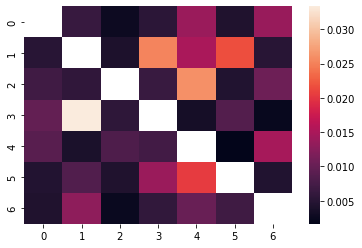

In [2]:

X = pd.read_csv('X.csv',header=None)
X  = np.array(X).T # X must be numpy array in shape of (num var, num rows)
aic, bic, moaic, mobic = tsdata_to_infocrit(X,10, False)

# p = moaic
p = 3


A, SIG, E = tsdata_to_var(X, moaic)
G= var_to_autocov(A,SIG, q = 100)
F = autocov_to_pwcgc(G,SIG)



sns.heatmap(F)
pd.DataFrame(np.round(F,4))